# Quantum Computing Using IBM Qiskit 

## Session 2.  Algorithm

### Hwajung Kang,  Ph.D.,  IBM Quantum

In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq import least_busy

import numpy as np

provider = IBMQ.load_account()

/opt/miniconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


## Hands on Problem

1. Construct a quantum circuit that gives the 5 qubit state $|\psi\rangle = \frac{1}{\sqrt{2}}(|00000\rangle+|11111\rangle)$

2. Simulate circuit to verify you get what you expect.

3. Run on a real quantum device (pick any one).

4. Plot the results.

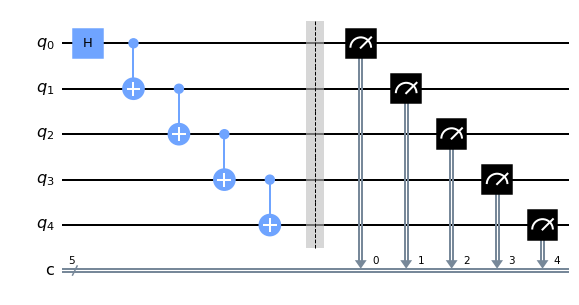

In [2]:
ghz1 = QuantumCircuit(5, 5)
ghz1.h(0)
ghz1.cx(0, 1)
ghz1.cx(1, 2)
ghz1.cx(2, 3)
ghz1.cx(3, 4)
ghz1.barrier()
ghz1.measure(range(5), range(5))
ghz1.draw('mpl')

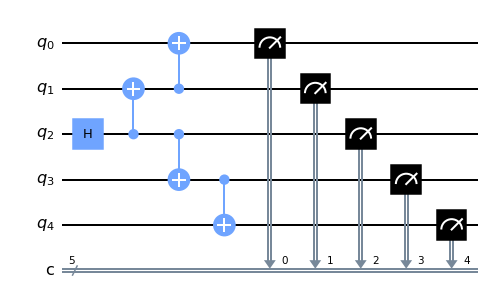

In [3]:
ghz2 = QuantumCircuit(5, 5)
ghz2.h(2)
ghz2.cx(2, 1)
ghz2.cx(1, 0)
ghz2.cx(2, 3)
ghz2.cx(3, 4)
ghz2.measure(range(5), range(5))
ghz2.draw('mpl')

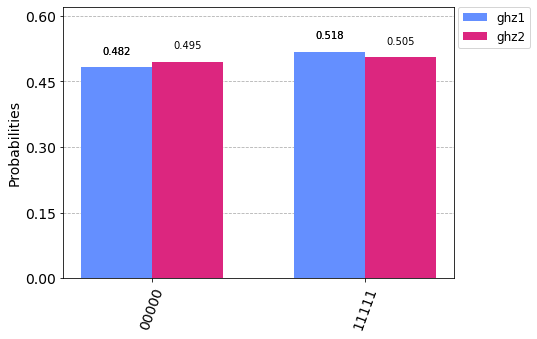

In [4]:
backend = Aer.get_backend('qasm_simulator')

job = execute([ghz1, ghz2], backend)
counts = job.result().get_counts()

plot_histogram(counts, legend=['ghz1', 'ghz2'])

In [12]:
backend = provider.get_backend('ibmq_vigo')

job = execute([ghz1, ghz2], backend, shots=max_shots)
print(job.job_id())
job_monitor(job)


Tip: If doing multiple circuits, always execute them together. It is much more efficient.

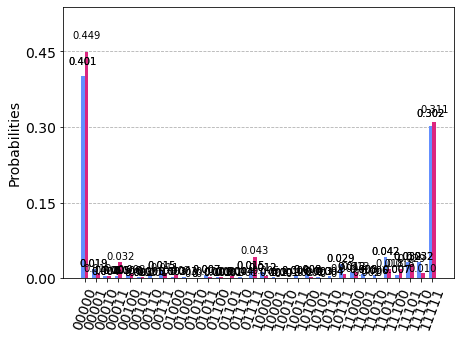

In [11]:
#job = backend.retrieve_job('5fb2d019475a5000124186b4')
#counts = job.result().get_counts()

plot_histogram(counts)

The circuit that is run is NOT, in general, the circuit that is actually run.

- When calling `execute`, circuits need to be transformed for the chosen backend by the `transpiler`.

- need circuits to contain only those gates that the quantum computer can actually perform.

- Since qubits are not all-to-all connected, must add swaps.

- `transpile` takes circuits, and returns modified / optimized circuits.

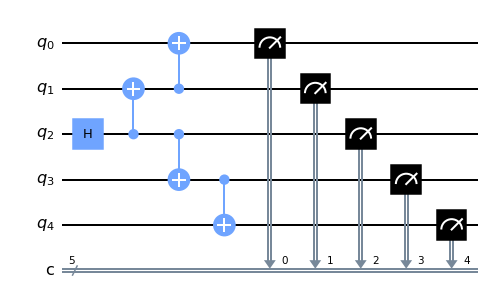

In [5]:
ghz2 = QuantumCircuit(5, 5)
ghz2.h(2)
ghz2.cx(2, 1)
ghz2.cx(1, 0)
ghz2.cx(2, 3)
ghz2.cx(3, 4)
ghz2.measure(range(5), range(5))
ghz2.draw('mpl')

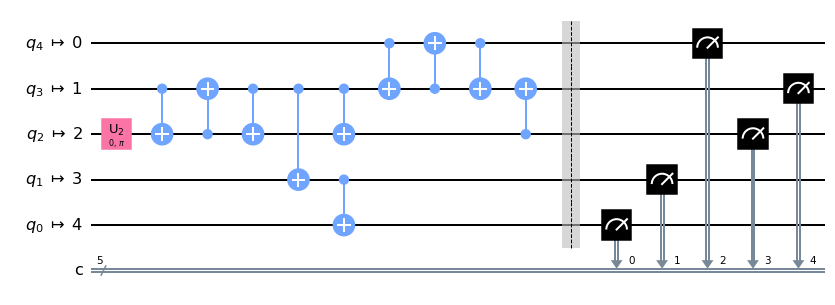

In [5]:
backend = provider.get_backend('ibmq_vigo')

ghz2_trans = transpile(ghz2, backend)
ghz2_trans.draw('mpl')

#### Important Circuit Properties

- Circuit depth; A measure of how 'long' the circuit is.

- number of non-local gates in a circuit; the number of CNOT.

<img src="images/depth.png" style="height:400px;"/>

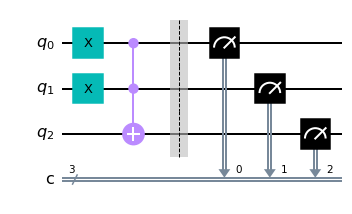

In [14]:
# toffoli
toffoli = QuantumCircuit(3, 3)
toffoli.x(range(2))
toffoli.ccx(0, 1, 2)
toffoli.barrier()
toffoli.measure(range(3), range(3))
toffoli.draw('mpl')

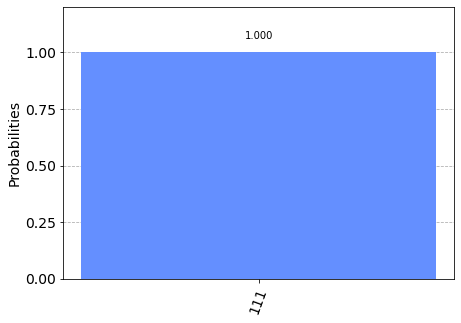

In [15]:
backend = Aer.get_backend('qasm_simulator')

counts = execute(toffoli, backend).result().get_counts()
plot_histogram(counts)

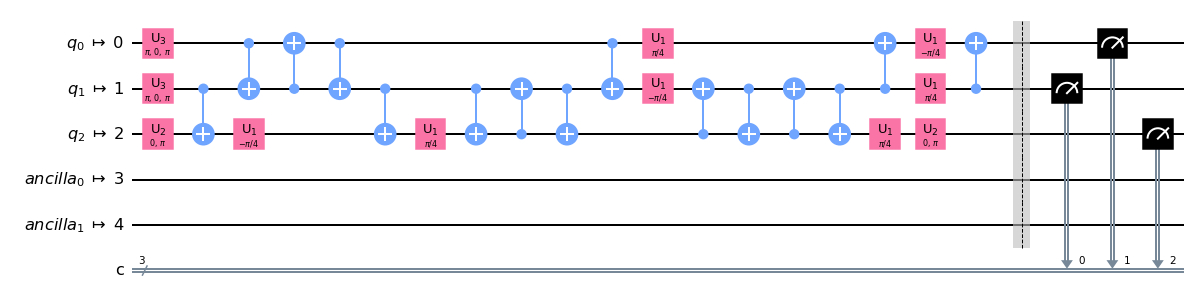

In [29]:
backend = provider.get_backend('ibmq_vigo')

toffoli_trans = transpile(toffoli, backend, optimization_level=0)
toffoli_trans.draw('mpl')

In [30]:
toffoli_trans.depth()

20

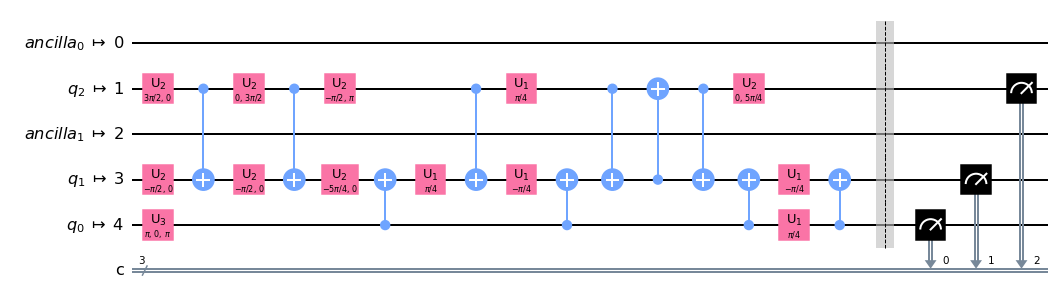

In [26]:
toffoli_trans_best = transpile(toffoli, backend, optimization_level=3)
toffoli_trans_best.draw('mpl')

In [27]:
toffoli_trans_best.depth()

17

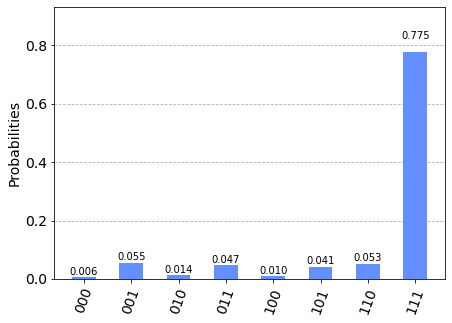

In [31]:
job = execute(toffoli, backend, shots=max_shots, optimization_level=3)
print(job.job_id())
job_monitor(job)

# counts = backend.retrieve_job('5fb3e79a8a658400121a88f8').result().get_counts()
# plot_histogram(counts)

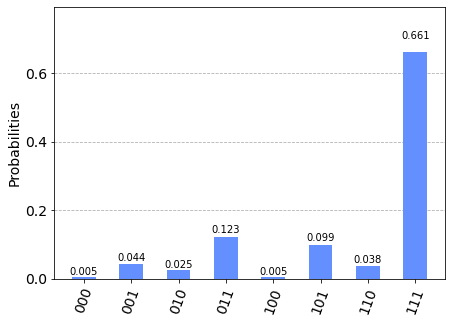

In [32]:
job = execute(toffoli, backend, shots=max_shots, optimization_level=0)
print(job.job_id())
job_monitor(job)

# counts = backend.retrieve_job('5fb3e7ec79d9360014491840').result().get_counts()
# plot_histogram(counts)

# Concepts
## Oracle, Phase Kickback, Deutsch's algorithm 

![](images/HPC_Korea_session2.001.jpeg)

![](images/HPC_Korea_session2.002.jpeg)

![](images/HPC_Korea_session2.003.jpeg)

![](images/HPC_Korea_session2.004.jpeg)

![](images/HPC_Korea_session2.005.jpeg)

![](images/HPC_Korea_session2.006.jpeg)

![](images/HPC_Korea_session2.007.jpeg)

![](images/HPC_Korea_session2.008.jpeg)

![](images/HPC_Korea_session2.009.jpeg)

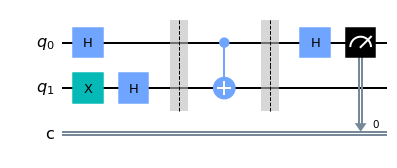

In [6]:
qc = QuantumCircuit(2, 1)

# set ancilla |->
qc.x(1)
qc.h(1)

# H on input qubit
qc.h(0)

qc.barrier()
# oracle for the function f(x) = x
qc.cx(0, 1)

qc.barrier()
# H for interfere
qc.h(0)

# measure
qc.measure(0, 0)

qc.draw('mpl')

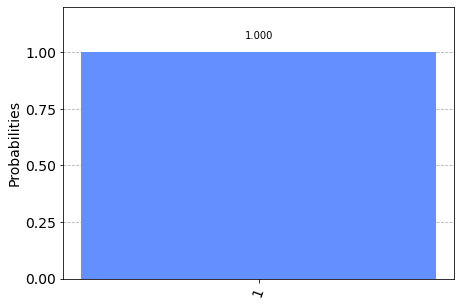

In [7]:
backend = Aer.get_backend('qasm_simulator')

counts = execute(qc, backend).result().get_counts()
plot_histogram(counts)

![](images/HPC_Korea_session2.010.jpeg)

![](images/HPC_Korea_session2.011.jpeg)

![](images/HPC_Korea_session2.012.jpeg)

![](images/HPC_Korea_session2.013.jpeg)

![](images/HPC_Korea_session2.014.jpeg)

![](images/HPC_Korea_session2.015.jpeg)

![](images/HPC_Korea_session2.016.jpeg)

![](images/HPC_Korea_session2.017.jpeg)

![](images/HPC_Korea_session2.014.jpeg)

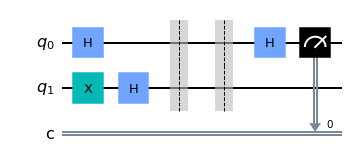

In [8]:
# create Oracle for a constant boolean function, f(x) = 0

const = QuantumCircuit(2, 1)

## ancilla
const.x(1)
const.h(1)

## input
const.h(0)

const.barrier()
## oracle


const.barrier()
## gates for interference
const.h(0)

## measure
const.measure(0, 0)

const.draw('mpl')

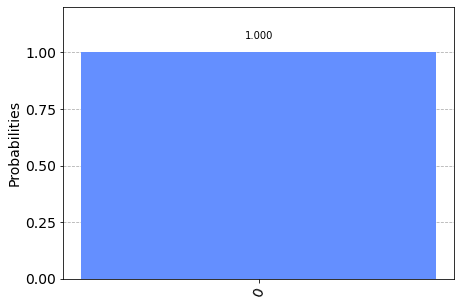

In [9]:
backend = Aer.get_backend('qasm_simulator')

counts = execute(const, backend).result().get_counts()
plot_histogram(counts)

## Hands on Problem


**1. Build Deutsch's algorithm circuits, `qc_b` and `qc_c` for the balanced boolean function $f(0)=1, f(1)=0$ and for the constant one $f(0)=f(1)=1$, respectively.** 


**2. Execute them on `qasm_simulator` .**

- for balanced function, expect to measure the 0th qubit value 1 with probability 1.
- for constant function, expect to measure the 0th qubit value 0 with probability 1. 

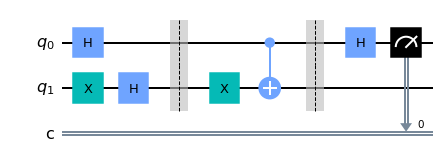

In [10]:
## balanced 
qc_b = QuantumCircuit(2, 1)
###
qc_b.x(1)
qc_b.h(1)
####
qc_b.h(0)

qc_b.barrier()
###
qc_b.x(1)
qc_b.cx(0, 1)

qc_b.barrier()
####
qc_b.h(0)

qc_b.measure(0, 0)

qc_b.draw('mpl')

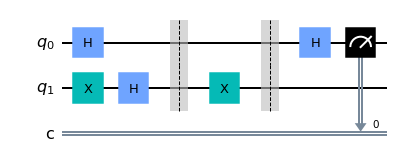

In [11]:
## constant
qc_c = QuantumCircuit(2, 1)

qc_c.x(1)
qc_c.h(1)
####
qc_c.h(0)

qc_c.barrier()
####

qc_c.x(1)

qc_c.barrier()
####
qc_c.h(0)
qc_c.measure(0, 0)

qc_c.draw('mpl')

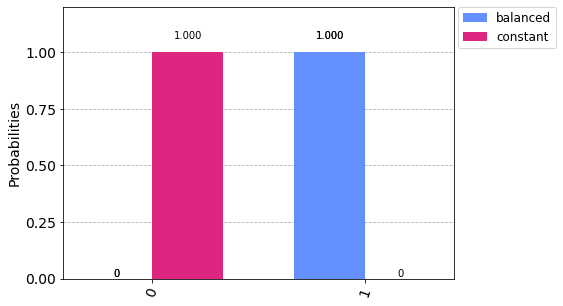

In [12]:
## simulate

counts = execute([qc_b, qc_c], backend).result().get_counts()
plot_histogram(counts, legend=['balanced', 'constant'])

# Concepts
## Deutsch - Jozsa algorithm

![](images/HPC_Korea_session2.019.jpeg)

![](images/HPC_Korea_session2.020.jpeg)

![](images/HPC_Korea_session2.021.jpeg)

![](images/HPC_Korea_session2.022.jpeg)

![](images/HPC_Korea_session2.023.jpeg)

![](images/HPC_Korea_session2.024.jpeg)

![](images/HPC_Korea_session2.025.jpeg)

![](images/HPC_Korea_session2.026.jpeg)

![](images/HPC_Korea_session2.027.jpeg)

![](images/HPC_Korea_session2.028.jpeg)

![](images/HPC_Korea_session2.030.jpeg)

![](images/HPC_Korea_session2.029.jpeg)

![](images/HPC_Korea_session2.031.jpeg)

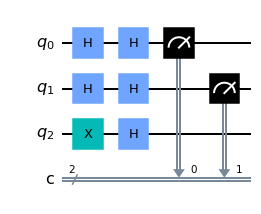

In [22]:
qc2_c = QuantumCircuit(3, 2)
qc2_c.x(2)
qc2_c.h(2)
qc2_c.h(range(2))
qc2_c.h([0, 1])
qc2_c.measure(range(2), range(2))
qc2_c.draw('mpl')

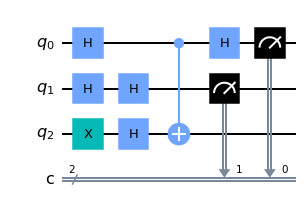

In [14]:
qc2_b = QuantumCircuit(3, 2)
qc2_b.x(2)
qc2_b.h(2)
qc2_b.h([0, 1])
qc2_b.cx(0, 2)
qc2_b.h([0, 1])
qc2_b.measure([0, 1], [0, 1])
qc2_b.draw('mpl')

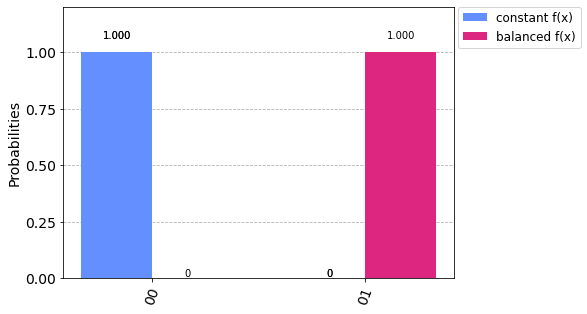

In [15]:
counts = execute([qc2_c, qc2_b], backend).result().get_counts()
plot_histogram(counts, legend=['constant f(x)', 'balanced f(x)'])

In [12]:
provider = IBMQ.load_account()
provider.backends()

/opt/miniconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [29]:
max_shot = 8192

backend = provider.get_backend('ibmq_valencia')
#backend = least_busy(provider.backends(filters=lambda x:not x.configuration().simulator and 
#                                     x.configuration().n_qubits >= 3 and x.status().operational==True))

print(backend)

job = execute([qc2_c, qc2_b], backend, shots=max_shot, optimization_level=3)
print(job.job_id())
job_monitor(job)

ibmq_valencia
5fbc191b4d6ebc0012b9f700
Job Status: job has successfully run


In [23]:
# backend = provider.get_backend('ibmq_valencia')
# job = job.retrieve_job('5fbc0405b4bde50014c238ca')
# counts = job.result().get_counts()
# plot_histogram(counts, legend=['constant f(x)', 'balanced f(x)'] )

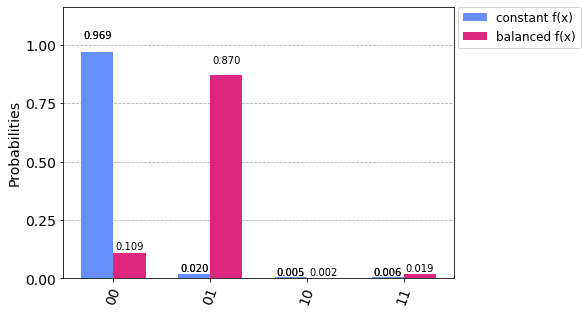

In [30]:
counts = job.result().get_counts()
plot_histogram(counts, legend=['constant f(x)', 'balanced f(x)'])

![](images/HPC_Korea_session2.032.jpeg)

## Hands on Problem

1. Construct a Deutsch-Jozsa algorithm circuit for a balanced Boolean function $f(x)$ when $f:\{0,1\}^4 \rightarrow \{0,1\}$.

2. Simulate the circuit to verify you get what you expect.

3. Run the circuit on a real quantum device ( pick any one ).

4. Plot the results.

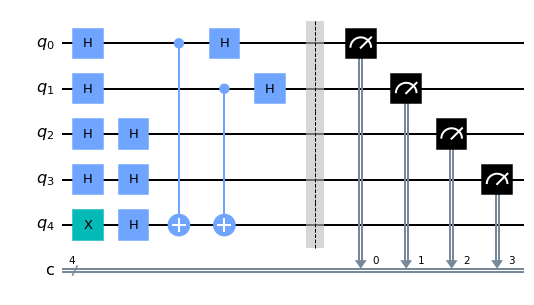

In [16]:
## Construct the quantum circuit 
dj4_b = QuantumCircuit(5, 4)
dj4_b.x(4)
dj4_b.h(4)
dj4_b.h(range(4))
dj4_b.cx(0, 4)
dj4_b.cx(1, 4)
dj4_b.h(range(4))
dj4_b.barrier()
dj4_b.measure(range(4), range(4))

dj4_b.draw('mpl')

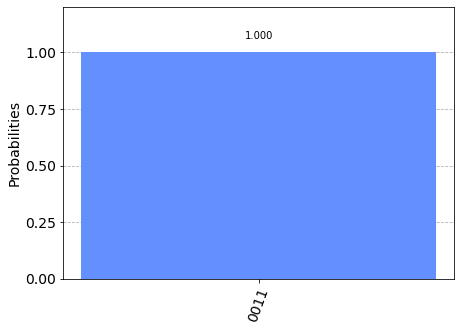

In [17]:
## Simulate
backend = Aer.get_backend('qasm_simulator')

count = execute(dj4_b, backend).result().get_counts()
plot_histogram(count)

In [43]:
## Run the circuit on a real quantum system
backend = provider.get_backend('ibmq_valencia')

job = execute(dj4_b, backend, shots=max_shot, optimization_level=3)
print(job.job_id())
job_monitor(job)

5fbc1cf3264ac600142b0e14
Job Status: job has successfully run


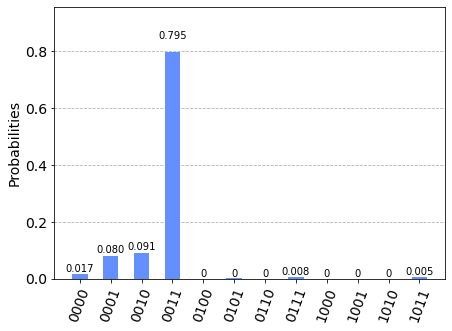

In [20]:
job = backend.retrieve_job('5fbc1cf3264ac600142b0e14')

plot_histogram(job.result().get_counts())

### Where to go from here 

- [A Field Guide to Quantum Computing](https://quantum-computing.ibm.com/docs/iqx/guide/)
- [Qiskit textbook](https://qiskit.org/textbook/preface.html)
- [Coding with Qiskit](https://www.youtube.com/playlist?list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY)
- [1 Minute Qiskit](https://www.youtube.com/playlist?list=PLOFEBzvs-VvpOCmJ9BonUhf7NYB4d1p0e)
- [Qiskit tutorials](https://qiskit.org/documentation/tutorials/circuits/1_getting_started_with_qiskit.html)

## Challenge - Phase Oracle

The Oracle that we buit for the Deutsch-Jozsa algorithm utilizes `Phase-kickback`. The Oracle can also be constructed with `phase gates` to encode the function value on the phase of each output instead of the phase kickback. In this way, the ancilla, $|-\rangle$ is not needed, hence, the quantum circuit requires one less qubit. Such Oracle is called **phase oracle**. 

1. Construct a Deutsch-Jozsa algorithm circuit with a phase oracle for a balanced Boolean function $f(x)$ when $f:\{0,1\}^3 \rightarrow \{0,1\}$.


2. Simulate the circuit to verify you get what you expect.
  ( Since $f(x)$ is a balanced Boolean function, the probability to measure $|000\rangle$ should be zero. )


3. Run the circuit on a real quantum device ( pick any one ).


4. Plot the results.


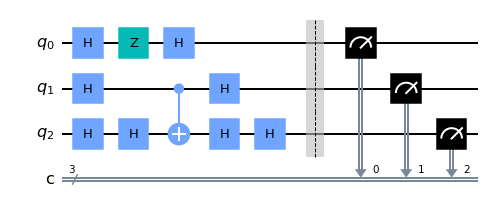

In [4]:
## example circuit 1
dj3_phase_b = QuantumCircuit(3, 3)
dj3_phase_b.h(range(3))
dj3_phase_b.z(0)
dj3_phase_b.h(2)
dj3_phase_b.cx(1,2)
dj3_phase_b.h(2)
dj3_phase_b.h(range(3))
dj3_phase_b.barrier()
dj3_phase_b.measure(range(3), range(3))

dj3_phase_b.draw('mpl')


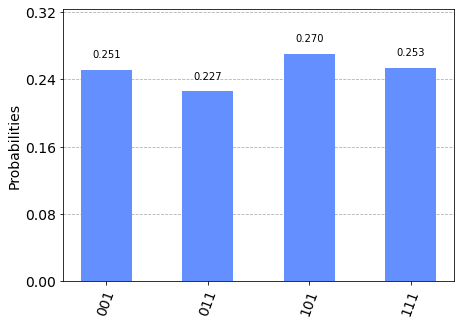

In [57]:
backend = Aer.get_backend('qasm_simulator')

counts = execute(dj3_phase_b, backend).result().get_counts()
plot_histogram(counts)

In [58]:
backend = provider.get_backend('ibmq_valencia')

job = execute(dj3_phase_b, backend, shots=max_shot, optimization_level=3)
print(job.job_id())
job_monitor(job)

5fbc29025af2a400122fc3c3
Job Status: job has successfully run


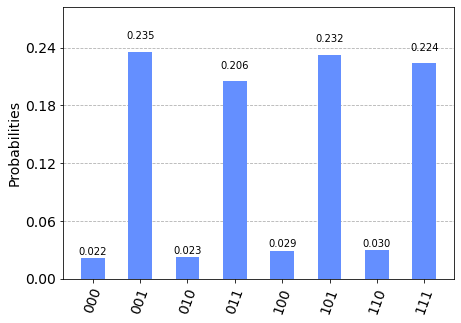

In [59]:
plot_histogram(job.result().get_counts())

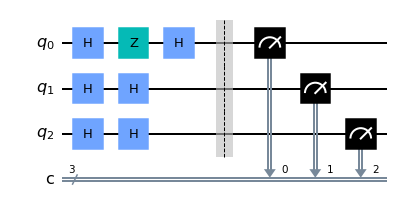

In [7]:
## example circuit 2
dj3_phase_b1 = QuantumCircuit(3,3)
dj3_phase_b1.h(range(3))
dj3_phase_b1.z(0)
dj3_phase_b1.h(range(3))
dj3_phase_b1.barrier()
dj3_phase_b1.measure(range(3), range(3))

dj3_phase_b1.draw('mpl')

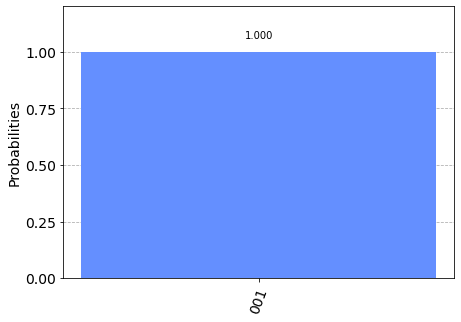

In [9]:
backend = Aer.get_backend('qasm_simulator')
counts = execute(dj3_phase_b1, backend).result().get_counts()
plot_histogram(counts)